In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練圖片答案), (測試圖片, 測試圖片答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (60000, 28, 28)
測試資料維度: (10000, 28, 28)


正確答案 2


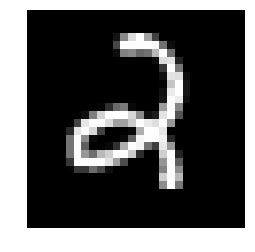

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("正確答案", y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,13,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,111,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,228,34,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,119,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,228,222,13,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,197,254,23,0,0,0,0,0,0,0


In [6]:
# Step 1.1處理圖片
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
x_train_shape[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
# Step 1.2處理答案
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 5
處理後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=784))
model.add(Dense(10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
model.fit(x_train_shape, 
          y_train_cat, 
          batch_size=200, 
          epochs=15, 
          validation_split=0.1,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 2s - loss: 0.0380 - acc: 0.9897 - val_loss: 0.0731 - val_acc: 0.9793
Epoch 2/5
 - 1s - loss: 0.0321 - acc: 0.9924 - val_loss: 0.0754 - val_acc: 0.9795
Epoch 3/5
 - 1s - loss: 0.0284 - acc: 0.9929 - val_loss: 0.0776 - val_acc: 0.9785
Epoch 4/5
 - 1s - loss: 0.0247 - acc: 0.9939 - val_loss: 0.0771 - val_acc: 0.9778
Epoch 5/5
 - 1s - loss: 0.0213 - acc: 0.9953 - val_loss: 0.0763 - val_acc: 0.9805


In [13]:
model.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 37us/step


[0.07064286814443767, 0.9783]

In [15]:
print("預測機率:", model.predict(x_test_shape))
print("預測答案:", model.predict_classes(x_test_shape))

預測機率: [[1.49405199e-08 3.35253408e-10 7.78302183e-06 ... 9.96940613e-01
  3.54825374e-06 5.89226256e-05]
 [4.35569150e-11 2.78570928e-06 9.99996185e-01 ... 4.27047500e-15
  1.39482257e-08 5.45809231e-12]
 [8.00090675e-06 9.96860266e-01 8.69035794e-05 ... 1.42578618e-03
  1.48887909e-03 1.34181528e-05]
 ...
 [1.00155446e-10 1.49105565e-12 8.44085045e-12 ... 6.49621711e-07
  2.29954458e-06 3.99282144e-04]
 [1.00159181e-09 1.55634349e-12 4.11740997e-12 ... 2.94092632e-11
  1.08310514e-05 1.24471733e-12]
 [5.64758622e-08 2.78393669e-10 1.30208463e-07 ... 5.98615260e-14
  4.51565618e-10 2.47277115e-10]]
預測答案: [7 2 1 ... 4 5 6]


In [17]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = model.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,969,0,1,0,1,1,2,1,4,1
1,0,1121,2,2,0,1,2,1,6,0
2,3,1,1006,2,2,0,3,7,7,1
3,1,0,2,985,1,4,0,5,7,5
4,1,0,3,1,954,2,3,2,1,15
5,2,0,0,6,1,870,4,1,4,4
6,6,2,1,1,3,4,938,0,3,0
7,1,3,8,3,1,0,0,1006,1,5
8,4,0,3,4,2,4,3,4,945,5
9,1,2,0,0,7,3,0,5,2,989


到底有幾個預測錯誤: 217


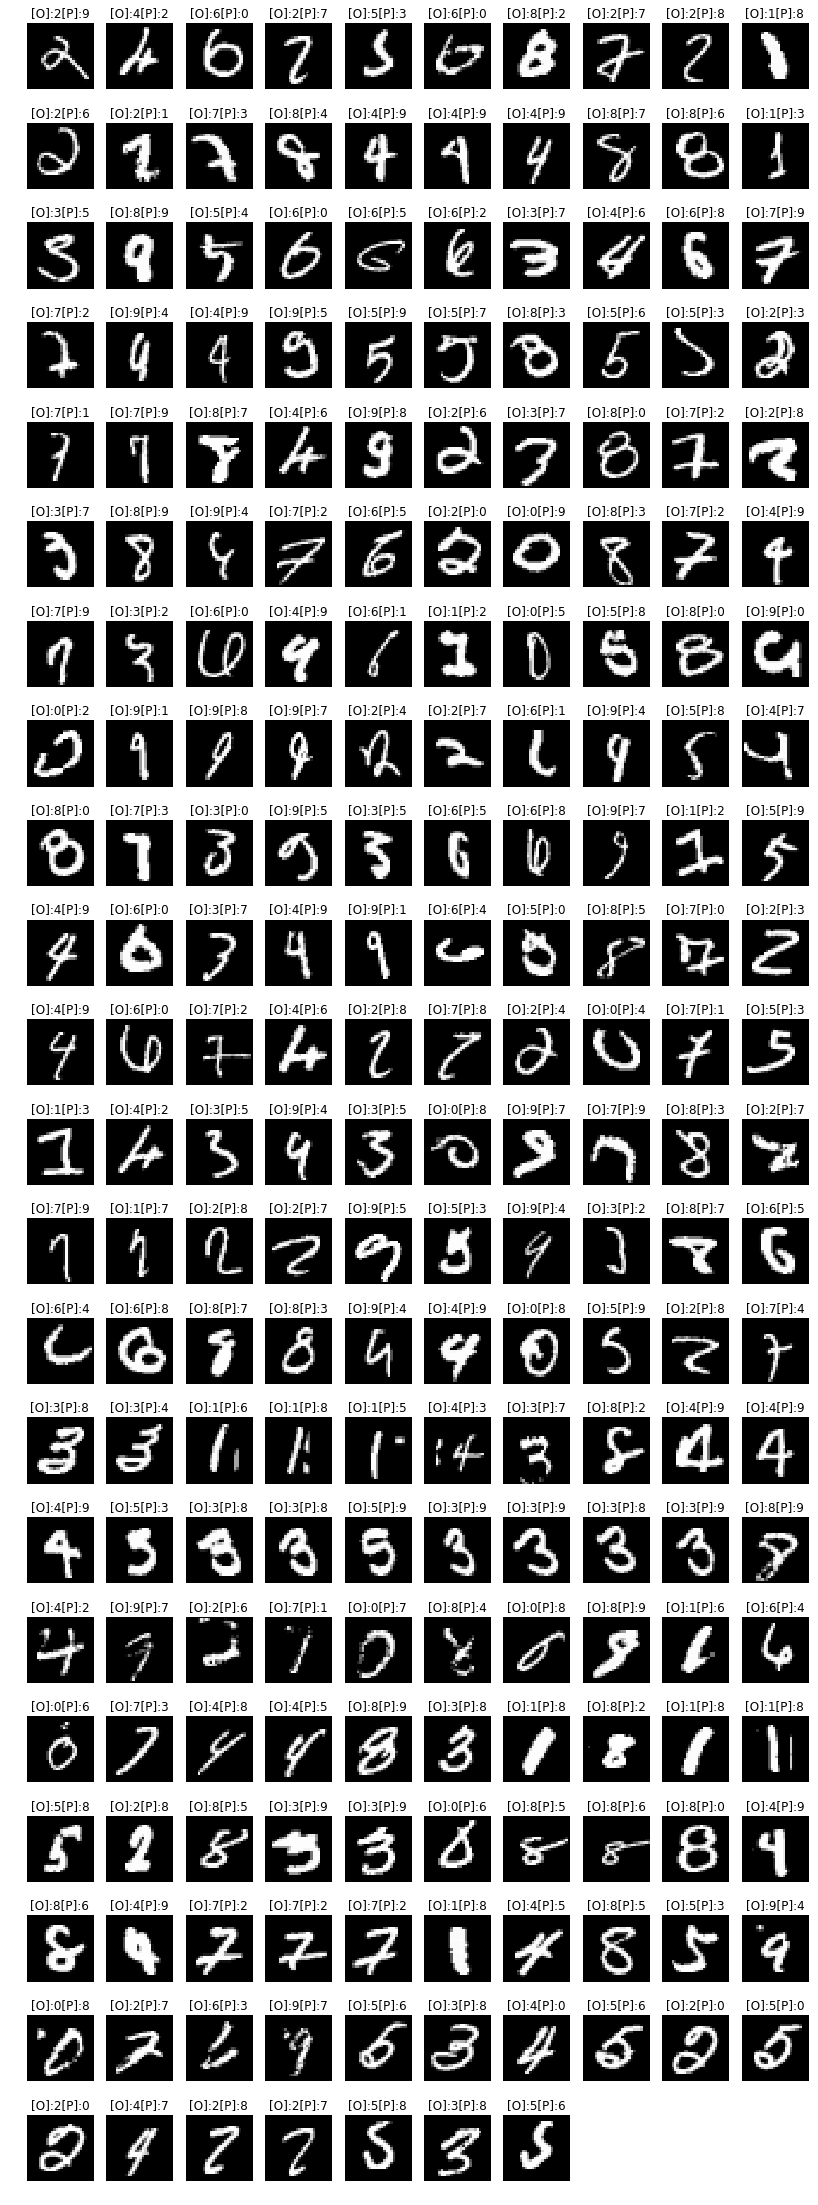

In [32]:
import numpy as np
false_index = np.nonzero(pre != y_test)[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 40))
for (index, img) in enumerate(false_img):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [34]:
model.save("mlp_mnist.h5")

In [35]:
from keras.models import load_model
loaded = load_model("mlp_mnist.h5")

In [36]:
loaded.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 82us/step


[0.07064286814443767, 0.9783]